## Установка параметров и генерация выборок

#### Математическое пояснение:
Задаем параметры для двух распределений:
- Экспоненциальное распределение: $Exp(\lambda)$, где $\lambda$ — интенсивность, $N$ — размер выборки.
- Гамма-распределение: $Gamma(\alpha, \beta)$, где $\alpha$ — параметр формы, $\beta$ — параметр масштаба.

Параметры:
- $N = 150$ — объем выборки.
- Для $Exp(\lambda)$: $\lambda_{\text{exp}} = 1$.
- Для $Gamma(\alpha, \beta)$: $\alpha_{\text{gamma}} = 2$, $\beta_{\text{gamma}} = 1$.

#### Простыми словами:
Тут мы подключаем инструменты и задаем настройки: сколько чисел сгенерировать и как они будут "выглядеть". Экспоненциальное — это как время ожидания события, а гамма — более сложная штука, связанная с несколькими такими ожиданиями.

In [ ]:
# Установка параметров
N <- 150
# Экспоненциальное распределение
lambda_exp <- 1
# Гамма-распределение
alpha_gamma <- 2
beta_gamma <- 1

# Генерация выборок
set.seed(123) # Для воспроизводимости
exp_sample <- rexp(N, rate = lambda_exp) # rate = 1/scale в Python
gamma_sample <- rgamma(N, shape = alpha_gamma, scale = beta_gamma)

## Гистограмма относительных частот, теоретическая плотность и оценка плотности

#### Математическое пояснение:
Строится гистограмма относительных частот $\frac{n_i}{N \cdot h}$, где $n_i$ — число значений в интервале, $h$ — ширина интервала. Добавляются:
- Теоретическая плотность: $f(x) = \lambda e^{-\lambda x}$ для экспоненциального, $f(x) = \frac{x^{\alpha-1} e^{-x/\beta}}{\beta^\alpha \Gamma(\alpha)}$ для гамма.
- Оценка плотности: оценка с использованием $KDE$.

#### Простыми словами:
Этот блок рисует гистограмму — как часто встречаются значения, красную линию — как это "должно быть" по теории, и зеленую — как мы сами оцениваем распределение по данным.

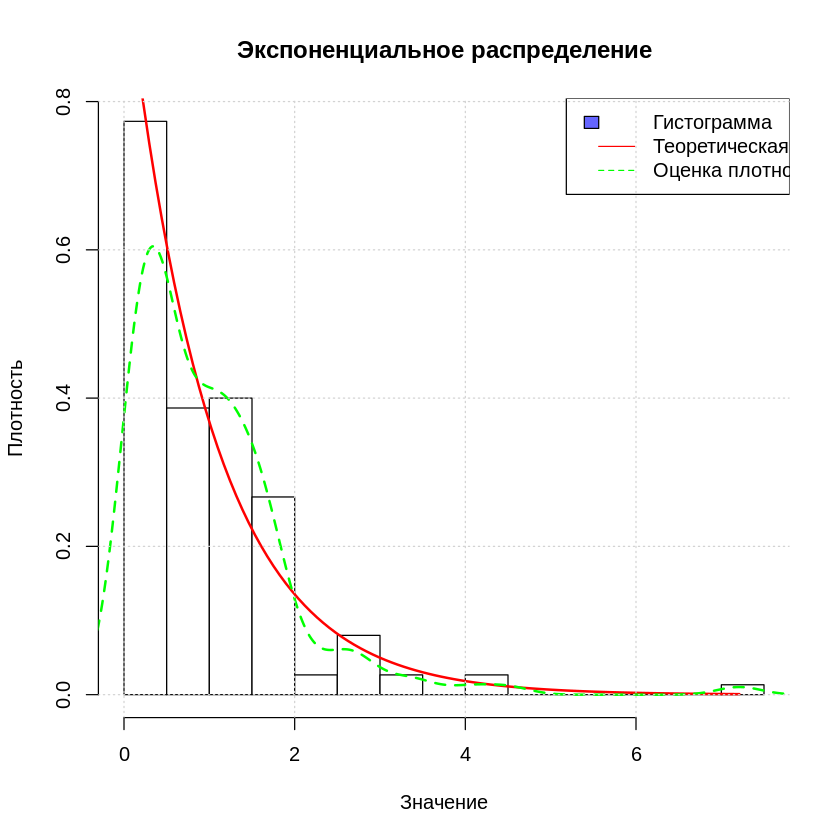

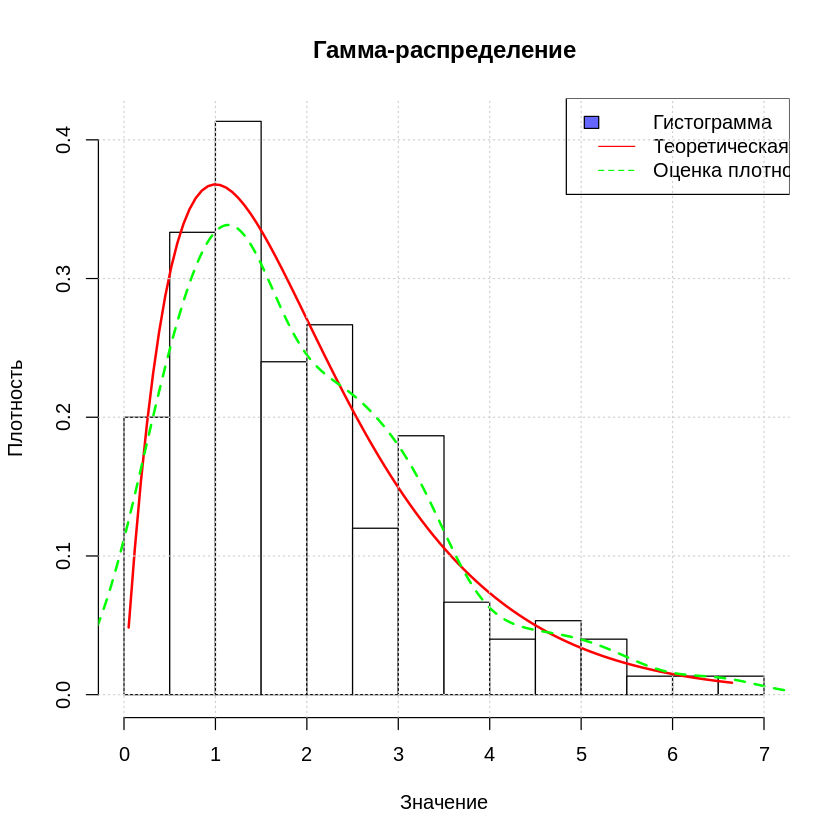

In [ ]:
# Функция для построения гистограммы и плотностей
plot_histogram_and_density <- function(sample, dist, title) {
  hist_data <- hist(sample, breaks = 20, plot = FALSE)
  plot(hist_data, col = rgb(1, 1, 1, 0.9), main = title, xlab = "Значение", ylab = "Плотность", freq = FALSE)
  x <- seq(min(sample), max(sample), length.out = 100)
  if (dist == "exp") {
    lines(x, dexp(x, rate = lambda_exp), col = "red", lwd = 2, lty = 1)
  } else if (dist == "gamma") {
    lines(x, dgamma(x, shape = alpha_gamma, scale = beta_gamma), col = "red", lwd = 2, lty = 1)
  }
  dens <- density(sample)
  lines(dens$x, dens$y, col = "green", lwd = 2, lty = 2)
  legend("topright", legend = c("Гистограмма", "Теоретическая плотность", "Оценка плотности"),
         fill = c(rgb(0, 0, 1, 0.6), NA, NA), col = c(NA, "red", "green"),
         lty = c(NA, 1, 2), border = c("black", NA, NA))
  grid()
}

# Построение графиков
plot_histogram_and_density(exp_sample, "exp", "Экспоненциальное распределение")
plot_histogram_and_density(gamma_sample, "gamma", "Гамма-распределение")

## Оценка числовых характеристик выборок

#### Математическое пояснение:
Вычисляются выборочные статистики:
- Среднее: $\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$.
- Дисперсия: $s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$.
- СКО: $s = \sqrt{s^2}$.
- Мода: наиболее частое округленное значение.
- Медиана: срединное значение упорядоченной выборки.
- Асимметрия: $\text{Skew} = \frac{\frac{1}{N} \sum (x_i - \bar{x})^3}{s^3}$.
- Эксцесс: $\text{Kurt} = \frac{\frac{1}{N} \sum (x_i - \bar{x})^4}{s^4} - 3$.

#### Простыми словами:
Тут мы считаем, что показывают данные: среднее значение, разброс, самое частое число (примерно), середину, а также насколько распределение "кривое" или "острое".

In [ ]:
# Функция для вычисления статистик
calculate_statistics <- function(sample) {
  mean_val <- mean(sample)
  var_val <- var(sample) # Выборочная дисперсия в R
  std_val <- sd(sample)
  mode_val <- as.numeric(names(sort(table(round(sample)), decreasing = TRUE)[1])) # Мода округленных значений
  median_val <- median(sample)
  skewness <- mean((sample - mean_val)^3) / std_val^3
  kurtosis <- mean((sample - mean_val)^4) / std_val^4 - 3
  return(c(mean_val, var_val, std_val, mode_val, median_val, skewness, kurtosis))
}

# Вычисление статистик
exp_stats <- calculate_statistics(exp_sample)
gamma_stats <- calculate_statistics(gamma_sample)

# Вывод результатов
cat("Экспоненциальное распределение:\n")
cat(sprintf("Среднее: %.4f, Дисперсия: %.4f, СКО: %.4f, Мода: %.0f, Медиана: %.4f, Асимметрия: %.4f, Эксцесс: %.4f\n",
            exp_stats[1], exp_stats[2], exp_stats[3], exp_stats[4], exp_stats[5], exp_stats[6], exp_stats[7]))

cat("Гамма-распределение:\n")
cat(sprintf("Среднее: %.4f, Дисперсия: %.4f, СКО: %.4f, Мода: %.0f, Медиана: %.4f, Асимметрия: %.4f, Эксцесс: %.4f\n",
            gamma_stats[1], gamma_stats[2], gamma_stats[3], gamma_stats[4], gamma_stats[5], gamma_stats[6], gamma_stats[7]))

Экспоненциальное распределение:
Среднее: 0.9996, Дисперсия: 0.9382, СКО: 0.9686, Мода: 1, Медиана: 0.8431, Асимметрия: 2.5726, Эксцесс: 11.1787
Гамма-распределение:
Среднее: 1.9644, Дисперсия: 1.8199, СКО: 1.3490, Мода: 1, Медиана: 1.5948, Асимметрия: 1.0373, Эксцесс: 0.8802


## Теоретические характеристики и сравнение

#### Математическое пояснение:
Теоретические характеристики:
- Экспоненциальное: $M = \frac{1}{\lambda}$, $D = \frac{1}{\lambda^2}$.
- Гамма: $M = \alpha \cdot \beta$, $D = \alpha \cdot \beta^2$.

Сравнение: $\Delta M = \bar{x} - M$, $\Delta D = s^2 - D$.

#### Простыми словами:
Считаем "идеальные" среднее и разброс по формулам и сравниваем с тем, что получилось из данных. Это как проверка, насколько наши числа близки к теории.

In [ ]:
# Теоретические характеристики
exp_mean_theor <- 1 / lambda_exp
exp_var_theor <- 1 / lambda_exp^2
gamma_mean_theor <- alpha_gamma * beta_gamma
gamma_var_theor <- alpha_gamma * beta_gamma^2

# Вывод теоретических характеристик и сравнение
cat("\nТеоретические характеристики:\n")
cat(sprintf("Экспоненциальное: M = %.4f, D = %.4f\n", exp_mean_theor, exp_var_theor))
cat(sprintf("Гамма: M = %.4f, D = %.4f\n", gamma_mean_theor, gamma_var_theor))

cat("Сравнение (оценка - теория):\n")
cat(sprintf("Экспоненциальное: Среднее: %.4f, Дисперсия: %.4f\n",
            exp_stats[1] - exp_mean_theor, exp_stats[2] - exp_var_theor))
cat(sprintf("Гамма: Среднее: %.4f, Дисперсия: %.4f\n",
            gamma_stats[1] - gamma_mean_theor, gamma_stats[2] - gamma_var_theor))


Теоретические характеристики:
Экспоненциальное: M = 1.0000, D = 1.0000
Гамма: M = 2.0000, D = 2.0000
Сравнение (оценка - теория):
Экспоненциальное: Среднее: -0.0004, Дисперсия: -0.0618
Гамма: Среднее: -0.0356, Дисперсия: -0.1801


## Оценки параметров

#### Математическое пояснение:
Оценки параметров методом моментов:
- Для $Exp(\lambda)$: $\hat{\lambda} = \frac{1}{\bar{x}}$.
- Для $Gamma(\alpha, \beta)$: $\hat{\alpha} = \frac{\bar{x}^2}{s^2}$, $\hat{\beta} = \frac{s^2}{\bar{x}}$.

#### Простыми словами:
Мы угадываем параметры распределений, глядя на среднее и разброс наших данных, и сравниваем с тем, что задали изначально.

In [ ]:
# Оценки параметров
lambda_exp_est <- 1 / exp_stats[1]
alpha_gamma_est <- (gamma_stats[1]^2) / gamma_stats[2] # Метод моментов
beta_gamma_est <- gamma_stats[2] / gamma_stats[1]

# Вывод оценок параметров
cat("\nОценки параметров:\n")
cat(sprintf("Экспоненциальное: Lamda = %.4f (теоретическое Lamda = %.4f)\n", lambda_exp_est, lambda_exp))
cat(sprintf("Гамма: alpha = %.4f, beta = %.4f (теоретические alpha = %.0f, beta = %.0f)\n",
            alpha_gamma_est, beta_gamma_est, alpha_gamma, beta_gamma))


Оценки параметров:
Экспоненциальное: Lamda = 1.0004 (теоретическое Lamda = 1.0000)
Гамма: alpha = 2.1204, beta = 0.9264 (теоретические alpha = 2, beta = 1)


## Критерий Хи2

#### Математическое пояснение:
Критерий $\chi^2$ проверяет соответствие выборки теоретическому распределению:
- $\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$, где $O_i$ — наблюдаемые частоты, $E_i$ — ожидаемые частоты.
- Степени свободы: $df = k - 1 - m$, где $k$ — число интервалов, $m$ — число оцениваемых параметров (1 для экспоненциального, 2 для гамма).
- $p$-значение: $P(\chi^2 > \chi^2_{\text{набл}})$.

#### Простыми словами:
Проверяем, насколько наши данные похожи на "идеальные" экспоненциальное или гамма-распределение. Большое $p$-значение — все ок, маленькое — есть расхождения.

In [ ]:
# Критерий Хи2 для экспоненциального распределения
bins_exp <- hist(exp_sample, breaks = "Sturges", plot = FALSE)$breaks
observed_exp <- hist(exp_sample, breaks = bins_exp, plot = FALSE)$counts
expected_exp <- N * diff(pexp(bins_exp, rate = lambda_exp))
chi2_exp <- sum((observed_exp - expected_exp)^2 / expected_exp)
df_exp <- length(observed_exp) - 1 - 1 # -1 для параметра Lamda
p_value_exp <- 1 - pchisq(chi2_exp, df_exp)

# Критерий Хи2 для гамма-распределения
bins_gamma <- hist(gamma_sample, breaks = "Sturges", plot = FALSE)$breaks
observed_gamma <- hist(gamma_sample, breaks = bins_gamma, plot = FALSE)$counts
expected_gamma <- N * diff(pgamma(bins_gamma, shape = alpha_gamma, scale = beta_gamma))
chi2_gamma <- sum((observed_gamma - expected_gamma)^2 / expected_gamma)
df_gamma <- length(observed_gamma) - 1 - 2 # -2 для параметров alpha и beta
p_value_gamma <- 1 - pchisq(chi2_gamma, df_gamma)

# Вывод результатов
cat(sprintf("\nКритерий Хи2 для экспоненциального: Хи2 = %.4f, p-value = %.4f\n", chi2_exp, p_value_exp))
cat(sprintf("Критерий Хи2 для гамма-распределения: Хи2 = %.4f, p-value = %.4f\n", chi2_gamma, p_value_gamma))


Критерий Хи2 для экспоненциального: Хи2 = 21.1509, p-value = 0.0017
Критерий Хи2 для гамма-распределения: Хи2 = 0.9518, p-value = 0.9170
